# **Difusão de Fake News ou Inovação via Spin-Flip**

## *Sistemas Complexos em Física e Além*

*Bruna Guedes Pereira*

*Professor orientador: Felipe David Crasto de Lima*

<font size="4.3">**1. Introdução**<font>
   
Este projeto investiga o comportamento coletivo de uma população modelada pelo Modelo de Ising bidimensional (2D), adaptado para representar opiniões sociais. Cada indivíduo (ou "spin") possui uma opinião binária (+1 ou −1) e pode ser influenciado por seus vizinhos. A dinâmica de evolução segue o Algoritmo de Metrópolis, que simula a probabilidade de mudança de opinião com base nas opiniões dos vizinhos a partir de uma "temperatura social" T representa a propensão a mudar de opinião mesmo contra a maioria (conformismo vs. individualismo).

Além da temperatura, exploramos o papel de líderes fixos — indivíduos com opinião imutável — e o tamanho da rede populacional. O objetivo é entender como essas variáveis afetam a opinião média da sociedade ao final das simulações.

Nesse contexto, o projeto visa estudar:

1. Quando e como surge o consenso (todos com a mesma opinião)?

2. Como a temperatura social afeta a polarização?

3. Qual é o impacto de líderes fixos (spins que não mudam) na opinião da rede?

4. Existe um limiar de temperatura abaixo do qual a opinião se cristaliza?

5. O tamanho da rede influencia no tempo necessário para atingir o consenso?

<font size="4.3">**2. Metodologia**<font>

*Modelo Computacional*

O modelo utilizado baseia-se no Modelo de Ising bidimensional (2D) com modificações para representar dinâmicas sociais de opinião. Cada elemento da rede corresponde a um indivíduo, cuja opinião é representada por um spin com valor +1 ou −1. A evolução do sistema segue a dinâmica do algoritmo de Metrópolis, com adaptações relevantes para o contexto social simulado:

* Rede 2D quadrada de tamanho variável (20×20 ou 50×50);

* Spins interpretados como opiniões binárias;

* Presença de nós fixos com opinião constante (+1), representando líderes de opinião;

* A temperatura social 𝑇 é ajustável e controla o grau de aleatoriedade (ou influência social) nas decisões dos indivíduos.

Observável principal:
Magnetização (opinião) média em cada contexto social simulado, sendo uma medida de consenso global.

*Parâmetros explorados:*

* *Temperatura social*

Na analogia com o Ising, 𝑇 → 0 indica que os indivíduos são altamente influenciados pelo ambiente (vizinhos) e quase nunca tomam decisões contrárias ao grupo. 𝑇 → ∞ significa que os indivíduos decidem aleatoriamente, ignorando totalmente os vizinhos — comportamento caótico, sem consenso. Considerando o modelo de Ising 2D padrão (sem campo externo), a temperatura crítica é 𝑇𝑐 ≈ 2.27 (em unidades de 𝑘𝐵 = 1). 
Nessa adaptação sociológica, abaixo de 𝑇 ≈ 1.0, haveria um comportamento muito conformista, com rápido consenso; acima de 𝑇 ≈ 3.0, opiniões muito diversas e com difícil estabilização; entre 1.5 e 2.5 seria uma região interessante onde podem surgir padrões e consenso parcial. Dessa forma, o intervalo [1, 5] escolhido cobre baixa temperatura (quase determinístico), temperatura crítica (fase de transição) e alta temperatura (desordem social).

* *Porcentagem de líderes fixos*

Spins fixos são indivíduos cujas opiniões não mudam com o tempo. Eles representam influenciadores estáveis, como políticos, celebridades ou especialistas com grande visibilidade. Esses líderes influenciam seus vizinhos, mas não são influenciados de volta. No caso, foram simulados as porcentagens 0%, 5%, 10%, sendo:

   0% (controle): Toda a população é "livre" para mudar de opinião. Serve como caso base (modelo de Ising puro).
   
   5% de líderes: Simula uma pequena minoria influente. Na prática, 5% de um grupo pode bastar para gerar forte viés ou estabilidade em sistemas reais (como visto em estudos sociológicos e modelos de rede). Permite observar se uma minoria ativa consegue levar a maioria a adotar sua opinião.
   
   10% de líderes: Representa um nível moderado de controle externo. Permite estudar se há um limiar (threshold) para o domínio de opinião.


* *Tamanho da rede:*

20×20 (400 pessoas, representando um grupo social local, como uma escola ou grupo de rede social) e 50×50 (2500 pessoas, representando um corpo social maior, como um bairro ou comunidade digital com mais indivíduos). Assim, é possível explorar se o tamanho da rede afeta a formação de consenso.


* *Número de simulações:*

Maior ou igual a 50 por conjunto de parâmetros, garantindo resultados estatisticamente significativos, plotagem de médias com barras de erro e comparação de curvas para diferentes temperaturas.

<font size="4">**✅ Modelo de Ising 2D com Metrópolis** <font>

In [4]:
pip install numpy matplotlib seaborn pandas tqdm

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [9]:
"""Importação de bibliotecas"""

import numpy as np #para trabalhar com arrays e números aleatórios
import matplotlib.pyplot as plt
import matplotlib.animation as animation #para plotar gráficos e criar animações
import seaborn as sns #para gráficos estatísticos bonitos.
import pandas as pd #organizar os resultados como tabelas
from tqdm import tqdm #mostrar barra de progresso nas simulações.
import random #sorteios e escolhas aleatórias.


def initialize_lattice(size, leader_fraction=0.0):
    """
    Cria a rede 2D de indivíduos (lattice) com opiniões +1 ou -1 e define quem são os líderes fixos (fixed), que nunca mudam de opinião.
    """
    lattice = np.random.choice([-1, 1], size=(size, size))  # matriz de spins
    fixed = np.zeros_like(lattice, dtype=bool)              # matriz de líderes

    num_leaders = int(leader_fraction * size * size)        # total de líderes
    indices = random.sample(range(size * size), num_leaders)  # sorteia posições únicas

    for idx in indices:
        i, j = divmod(idx, size)                            # converte índice linear para (i,j)
        lattice[i, j] = 1                                   # opinião fixa dos líderes = +1
        fixed[i, j] = True                                  # marca como líder

    return lattice, fixed


def metropolis_step(lattice, fixed, T):
    """
    Executa uma varredura de Metrópolis, ou seja, tenta inverter spins aleatoriamente com uma probabilidade dependente da temperatura T. 
    Spins com energia desfavorável podem mudar, mas com menor chance. Isso simula o "ruído social".
    """
    N = lattice.shape[0]
    for _ in range(N * N):  # um sweep = N² tentativas de flip
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if fixed[i, j]:
            continue  # pula líderes fixos

        spin = lattice[i, j]
        neighbors = lattice[(i+1)%N, j] + lattice[(i-1)%N, j] + lattice[i, (j+1)%N] + lattice[i, (j-1)%N]
        delta_E = 2 * spin * neighbors  # variação de energia

        # Condição de aceitação de Metrópolis
        if delta_E <= 0 or np.random.rand() < np.exp(-delta_E / T):
            lattice[i, j] *= -1  # inverte o spin (opinião)

def simulate(lattice, fixed, T, steps=1000):
    """
    Executa a simulação por steps passos e retorna a opinião média final da rede.
    """
    for _ in range(steps):
        metropolis_step(lattice, fixed, T)
    return np.mean(lattice)  # média final das opiniões

    

def run_experiments(temperatures, leader_fractions, sizes, num_runs=50):
    """
    Executa as simulações para todos os valores de temperatura, líderes e tamanhos de rede. 
    Repete num_runs vezes para obter estatísticas (média e desvio-padrão da opinião).
    """
    results = []
    for size in sizes:
        for lf in leader_fractions:
            for T in temperatures:
                avg_opinions = []
                for _ in tqdm(range(num_runs), desc=f"T={T}, Líderes={lf:.0%}, Rede={size}x{size}"):
                    lattice, fixed = initialize_lattice(size, lf)
                    mean_opinion = simulate(lattice, fixed, T)
                    avg_opinions.append(mean_opinion)

                results.append({
                    "T": T,
                    "leaders": lf,
                    "size": size,
                    "mean_opinion": np.mean(avg_opinions),
                    "std_opinion": np.std(avg_opinions),
                })
    return results


def plot_results(results):
    """
    Cria um gráfico com: x = temperatura T; y = opinião média final
    Linhas separadas por tamanho da rede e porcentagem de líderes
    """
    df = pd.DataFrame(results)
    sns.set(style="whitegrid")
    g = sns.FacetGrid(df, col="size", row="leaders", margin_titles=True)
    g.map_dataframe(sns.lineplot, x="T", y="mean_opinion", marker="o")
    g.set_axis_labels("Temperatura Social (T)", "Opinião Média")
    g.set_titles(row_template="Líderes = {row_name:.0%}", col_template="Rede {col_name}x{col_name}")
    plt.tight_layout()
    plt.show()

def animate_simulation(T=2.5, leader_fraction=0.05, size=50, steps=100, salvar=False):
    lattice, fixed = initialize_lattice(size, leader_fraction)

    fig, ax = plt.subplots()
    cmap = plt.get_cmap("bwr")  # azul = -1, vermelho = +1
    im = ax.imshow(lattice, cmap=cmap, vmin=-1, vmax=1)
    title = ax.set_title(f"T = {T} | Líderes = {leader_fraction:.0%} | {size}x{size}")

    def update(frame):
        for _ in range(5):
            metropolis_step(lattice, fixed, T)
        im.set_array(lattice)
        title.set_text(f"T = {T} | Líderes = {leader_fraction:.0%} | {size}x{size} | Frame {frame}")
        return [im, title]

    ani = animation.FuncAnimation(fig, update, frames=steps, interval=100, blit=True)
    plt.show()

    if salvar:
        gif_filename = f"ising_T{T}_L{int(leader_fraction*100)}_S{size}.gif"
        try:
            ani.save(gif_filename, writer="pillow", fps=10)
            print(f"Animação salva como {gif_filename}")
        except Exception as e:
            print("Erro ao salvar .gif:", e)
            print("Tente instalar o Pillow: pip install pillow")

    return ani


<font size="4.3">**3. Resultados e Discussão**<font>

T=5, Líderes=10%, Rede=50x50: 100%|████████████████████████████████████████████████████| 50/50 [50:09<00:00, 60.19s/it]


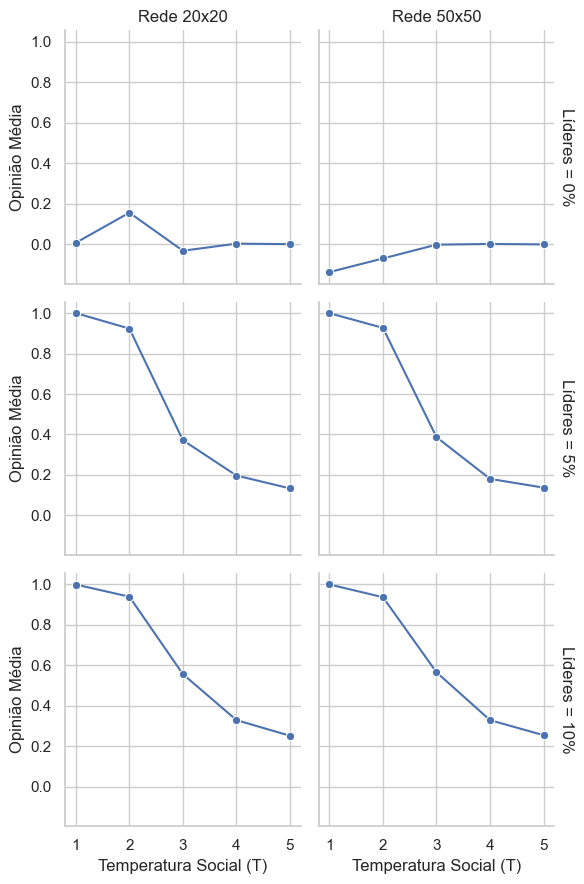

In [23]:
temperaturas = [1, 2, 3, 4, 5]
liderancas = [0.0, 0.05, 0.10]
tamanhos = [20, 50]
n_simulacoes = 50

resultados = run_experiments(temperaturas, liderancas, tamanhos, num_runs=n_simulacoes)
plot_results(resultados)

Quando não há líderes, quanto maior a temperatura social — ou seja, quanto menor a influência entre indivíduos — menor tende a ser o consenso na rede. Na rede 20×20, o maior nível de consenso ocorre quando a temperatura é igual a 2. Isso indica que, sem líderes, a opinião média na rede 20×20 é mais sensível à variação da temperatura do que na rede 50×50. Interessante observar que, dado o caráter aleatório do modelo computacional, podem ocorrer pequenas variações entorno 0.0. Esses aspectos podem explicar porque, na rede 20x20 a derivada da função com T pertencente a [2,3] é negativa, enqunto que, na rede 50x50 é positiva.

Com 5% de líderes fixos, observa-se que a magnetização média diminui à medida que a temperatura aumenta. O gráfico se assemelha a uma função exponencial decrescente.

Com 10% de líderes observa-se o mesmo padrão, com a diferença de que opinião média a cada temperatura medida é maior, indicando maior polarização. Portanto, quanto maior a proporção de líderes na rede, maior tende a ser o alinhamento da população com a opinião dominante dos líderes.

<font size="4">**✅ Formação de regiões após modelo de Ising 2D** <font>

<font size="3">**Temperatura social = 3.0*<font>

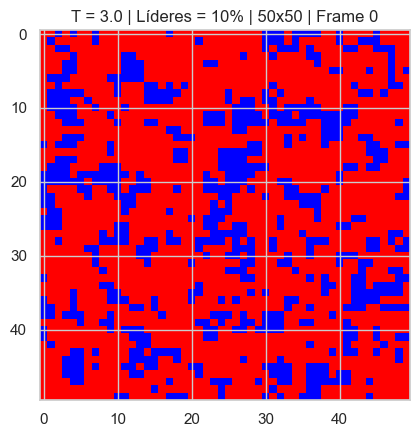

Animação salva como ising_T3.0_L10_S50.gif


In [25]:
animate_simulation(T=3.0, leader_fraction=0.10, size=50, steps=100, salvar=True)


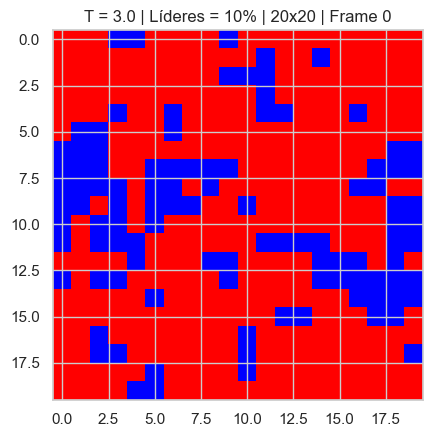

Animação salva como ising_T3.0_L10_S20.gif


In [26]:
animate_simulation(T=3.0, leader_fraction=0.10, size=20, steps=100, salvar=True)

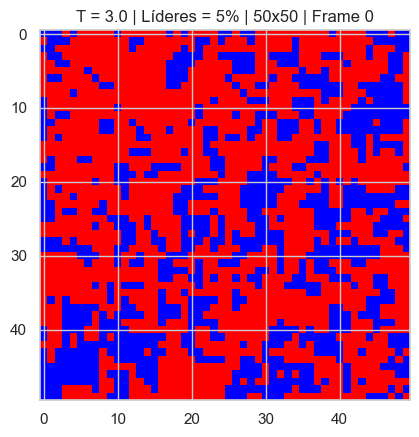

Animação salva como ising_T3.0_L5_S50.gif


In [27]:
animate_simulation(T=3.0, leader_fraction=0.05, size=50, steps=100, salvar=True)

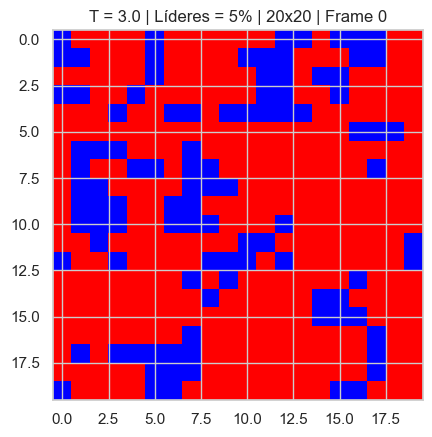

Animação salva como ising_T3.0_L5_S20.gif


In [28]:
animate_simulation(T=3.0, leader_fraction=0.05, size=20, steps=100, salvar=True)

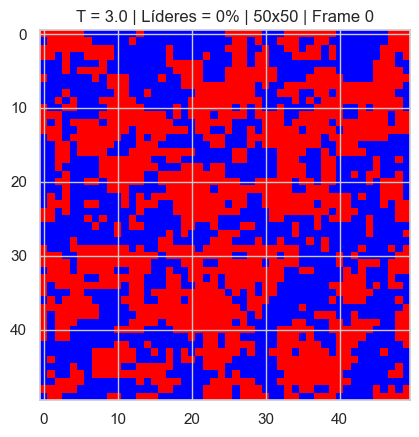

Animação salva como ising_T3.0_L0_S50.gif


In [29]:
animate_simulation(T=3.0, leader_fraction=0.0, size=50, steps=100, salvar=True)

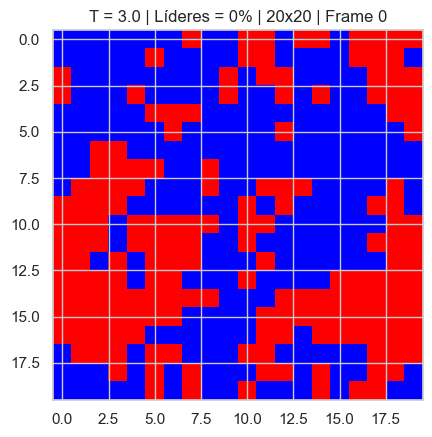

Animação salva como ising_T3.0_L0_S20.gif


In [30]:
animate_simulation(T=3.0, leader_fraction=0.0, size=20, steps=100, salvar=True)

<font size="3">**Temperatura social = 2.0*<font>

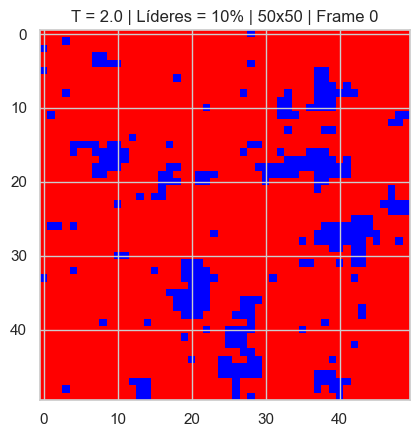

Animação salva como ising_T2.0_L10_S50.gif


In [36]:
animate_simulation(T=2.0, leader_fraction=0.10, size=50, steps=100, salvar=True)

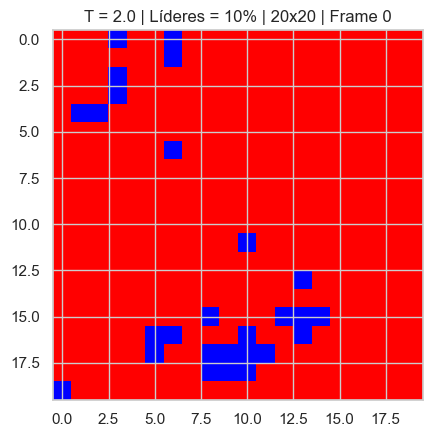

Animação salva como ising_T2.0_L10_S20.gif


In [37]:
animate_simulation(T=2.0, leader_fraction=0.10, size=20, steps=100, salvar=True)

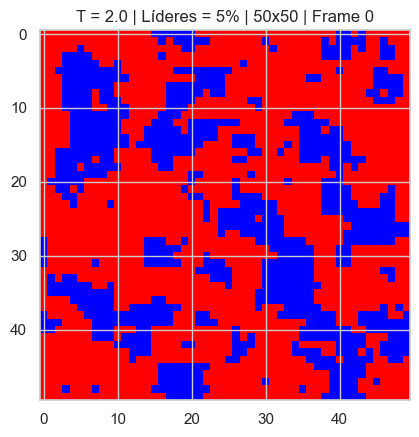

Animação salva como ising_T2.0_L5_S50.gif


In [38]:
animate_simulation(T=2.0, leader_fraction=0.05, size=50, steps=100, salvar=True)

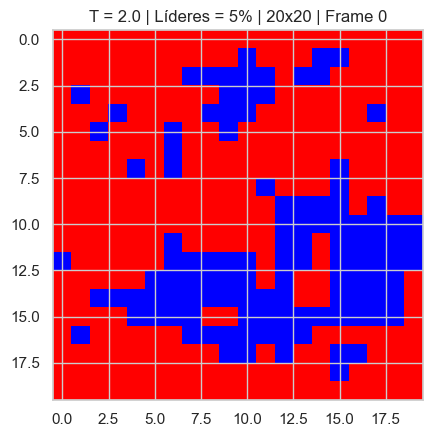

Animação salva como ising_T2.0_L5_S20.gif


In [39]:
animate_simulation(T=2.0, leader_fraction=0.05, size=20, steps=100, salvar=True)

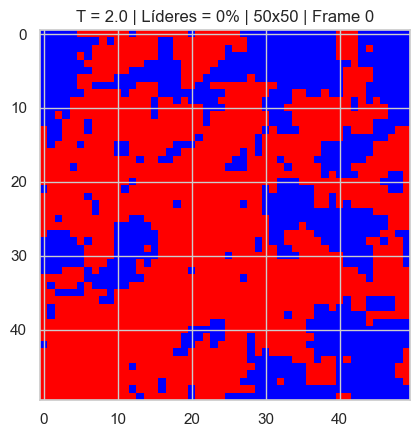

Animação salva como ising_T2.0_L0_S50.gif


In [40]:
animate_simulation(T=2.0, leader_fraction=0.0, size=50, steps=100, salvar=True)

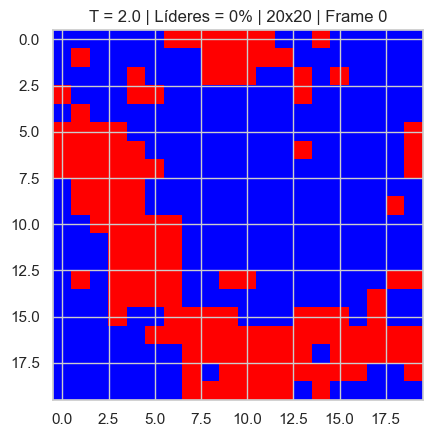

Animação salva como ising_T2.0_L0_S20.gif


In [41]:
animate_simulation(T=2.0, leader_fraction=0.0, size=20, steps=100, salvar=True)

<font size="3">**Temperatura social = 4.0*<font>

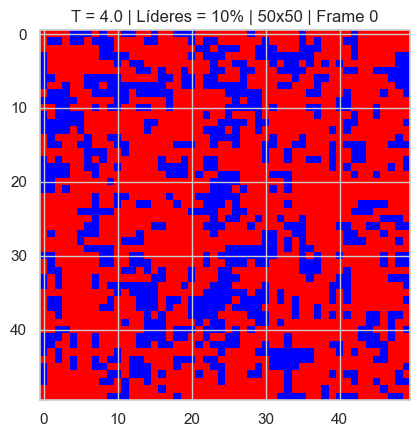

Animação salva como ising_T4.0_L10_S50.gif


In [43]:
animate_simulation(T=4.0, leader_fraction=0.10, size=50, steps=100, salvar=True)

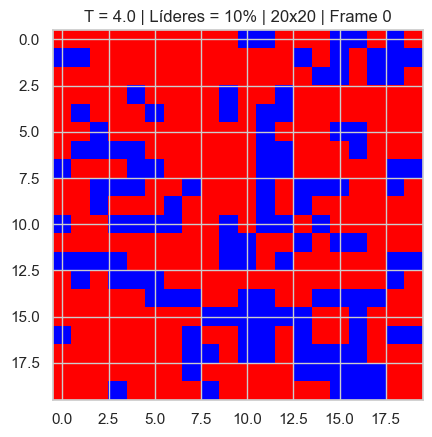

Animação salva como ising_T4.0_L10_S20.gif


In [44]:
animate_simulation(T=4.0, leader_fraction=0.10, size=20, steps=100, salvar=True)

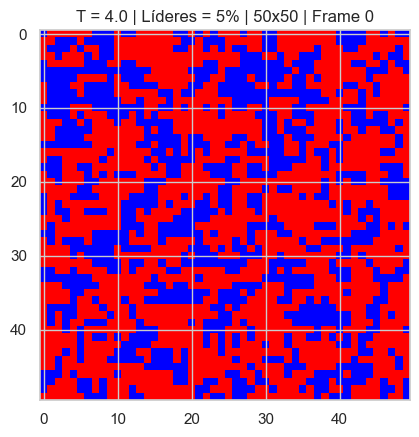

Animação salva como ising_T4.0_L5_S50.gif


In [45]:
animate_simulation(T=4.0, leader_fraction=0.05, size=50, steps=100, salvar=True)

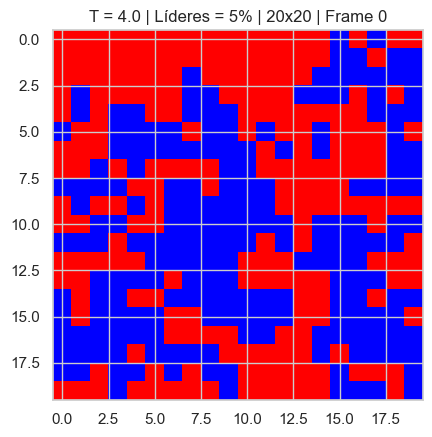

Animação salva como ising_T4.0_L5_S20.gif


In [46]:
animate_simulation(T=4.0, leader_fraction=0.05, size=20, steps=100, salvar=True)

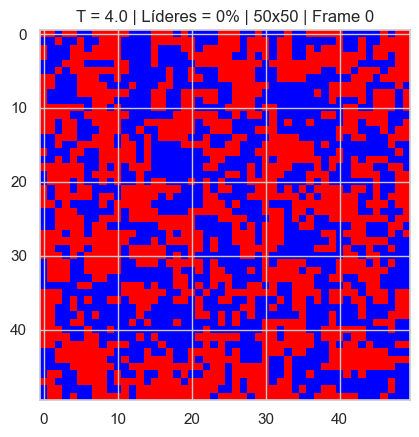

Animação salva como ising_T4.0_L0_S50.gif


In [47]:
animate_simulation(T=4.0, leader_fraction=0.0, size=50, steps=100, salvar=True)

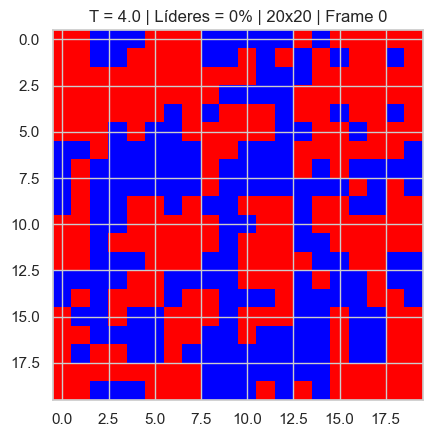

Animação salva como ising_T4.0_L0_S20.gif


In [48]:
animate_simulation(T=4.0, leader_fraction=0.0, size=20, steps=100, salvar=True)

Após análise dos gifs gerados pela execução, quando não há líderes, é perceptível que ambas as sociedades permanecem desmagnetizadas, caracterizando uma situação de pouco ou nenhum consenso.

Ao adicionar a presença dos líderes com opinião favorável (+1), as regiões azuis (-1), tornam-se menores quanto maior o for o percentual de indivíduos não influenciáveis. Dessa forma, ao longo das execuções, é possível identificar a formação de grupos com opinião contrária de forma periódica, que, após algum tempo, decrescem até uma quantidade mínima. Entretanto, em todos os steps, a maioria é sempre favorável (+1).
Depois de 100 passos, o cenário final assemelha-se ao inicial, sendo a maioria dos indivíduos favoráveis aos líderes.

É importante considerar que, quanto maior a rede, mais difícil é para alcançar o consenso.

**T = 2**

5% de líderes

20x20 - Formação de pequenas (no máximo 3 indivíduos) regiões azuis, que logo desaparecem. Regiões médias (~ 4 ou 6 indivíduos) raramente se formam.
50x50 - Regiões azuis muito menores que na rede 20x20, proporcionalmente. Ademais, são muito esparsas. Regiões médias (~ 4 ou 6 indivíduos) são mais raras.

10% de líderes

20x20 - Formação de regiões azuis de modo esparso, porém em médias menores do que quando há 5% de líderes, T = 2, 20x20.
50x50 - Raramente se formam regiões azuis médias ou médias-grandes (~8 ou 9 indivíduos), a maioria é pequena.

**T = 3**

5% de líderes

20x20 - Formação de regiões azuis médias e grandes.
50x50 - Formação de regiões médias-grandes e grandes, além de vários indivíduos azuis sem grupo.

10% de líderes
20x20 - Regiões azuis menores que T = 3, 5% de líderes, 20x20.
50x50 - Regiões azuis menores e menos indivíduos azuis solitários que T = 3, 5% de líderes, 50x50. 

**T = 4**

5% de líderes

20x20 - Formação de pequenas regiões azuis maiores que T = 2, com 5% de líderes.
50x50 - Regiões azuis muito menores que T = 2, com 5% de líderes. Essas regiões logo são dispersadas, porém outra semelhante se forma em outro lugar.

10% de líderes

20x20 - Muito se assemelha ao caso T = 4, 5% de líderes.
50x50 - Regiões azuis menores que no caso T= 4, 5% de líderes.


<font size="4">**✅ Relação entre consenso médio e líderes para cada temperatura social**<font>

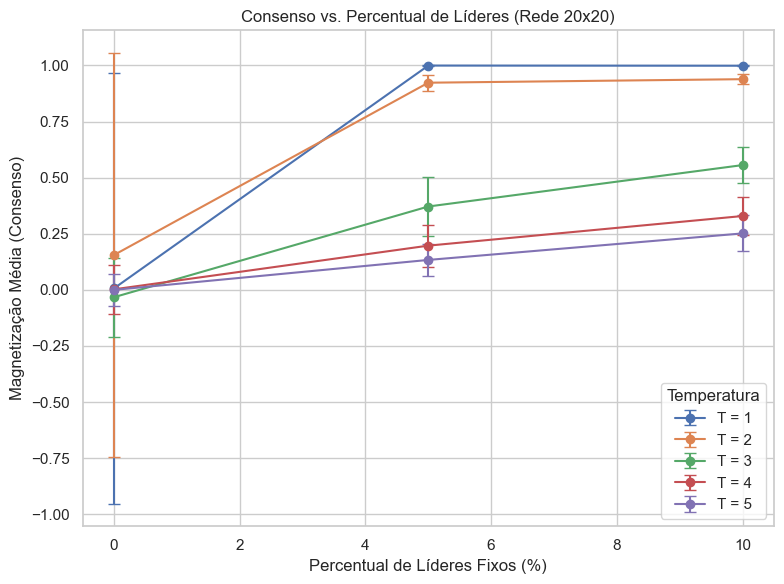

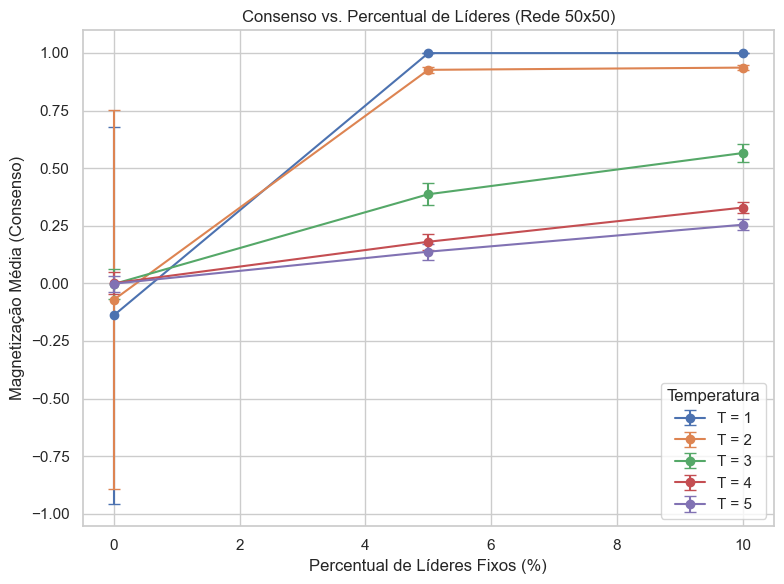

In [52]:
def plot_magnetization_by_size(results):
    df = pd.DataFrame(results)
    sizes = [20, 50]

    for size in sizes:
        df_size = df[df["size"] == size]

        plt.figure(figsize=(8, 6))
        for T in sorted(df_size["T"].unique()):
            subset = df_size[df_size["T"] == T].sort_values("leaders")
            plt.errorbar(
                subset["leaders"] * 100,
                subset["mean_opinion"],
                yerr=subset["std_opinion"],
                marker="o",
                capsize=4,
                label=f"T = {T}"
            )

        plt.title(f"Consenso vs. Percentual de Líderes (Rede {size}x{size})")
        plt.xlabel("Percentual de Líderes Fixos (%)")
        plt.ylabel("Magnetização Média (Consenso)")
        plt.grid(True)
        plt.legend(title="Temperatura")
        plt.tight_layout()
        plt.show()

plot_magnetization_by_size(resultados)

Em ambas as redes, quanto maior a temperatura social, menor é a influência do percentual de líderes sobre a magnetização média. Isso sugere que, em contextos altamente desordenados, a presença de líderes tem impacto limitado sobre o consenso coletivo.

Quando o percentual de líderes é igual a zero, a magnetização média varia muito entorno da magnetização média nula, considerando todas as temperaturas estudadas.

Além disso, observa-se que, nas medidas da rede 50×50, o erro padrão é menor, provavelmente porque o número maior de indivíduos fornece mais dados para o cálculo da média, reduzindo a variabilidade entre as simulações.
Por fim, é importante observar que, em geral, a rede 50×50 apresenta maior variabilidade nas opiniões (menor polarização) do que a rede 20×20 para todas as temperaturas testadas.

<font size="4">**✅Relação entre temperatura social, líderes, tamanho da rede e opinião média do grupo social** <font>

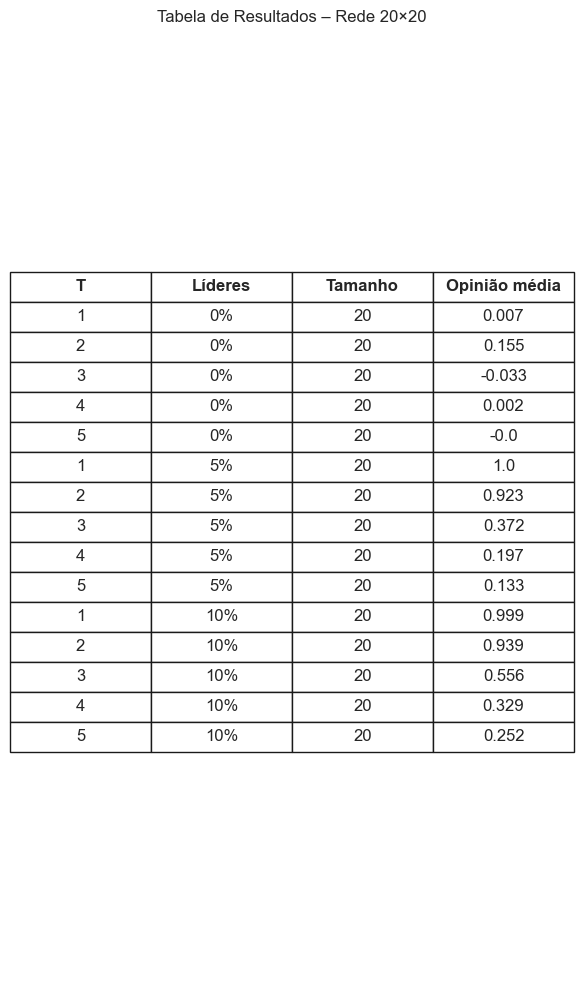

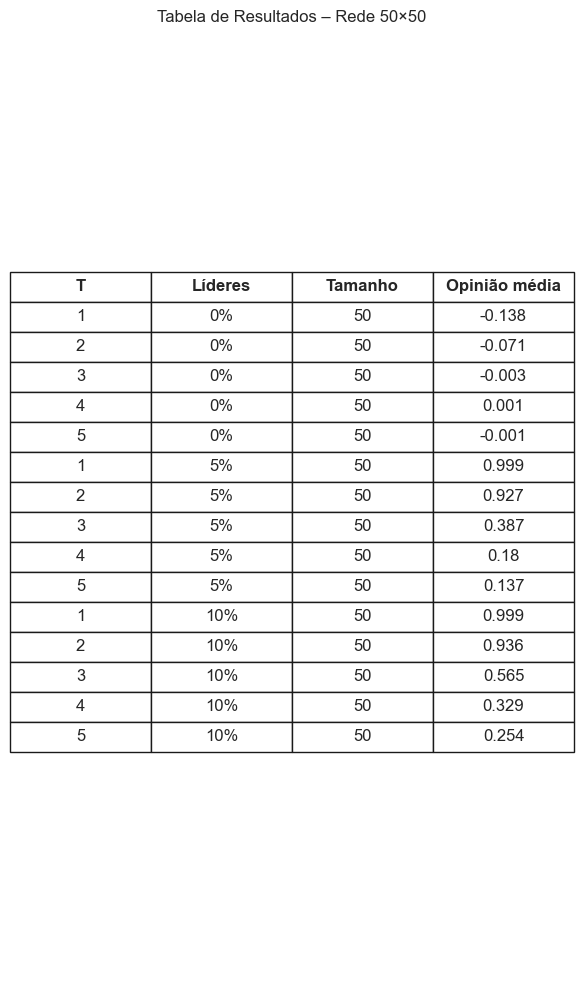

In [53]:
def plot_results_table2(results, fixed_size):
    df = pd.DataFrame(results)

    # Filtra para o tamanho desejado
    df_filtered = df[df["size"] == fixed_size].copy()

    # Seleciona colunas relevantes
    df_display = df_filtered[["T", "leaders", "size", "mean_opinion"]].copy()
    df_display.columns = ["T", "Líderes", "Tamanho", "Opinião média"]

    # Arredonda e converte os dados de forma ordenável
    df_display["Líderes (num)"] = df_display["Líderes"]  # copia valor numérico antes de formatar
    df_display["Líderes"] = (df_display["Líderes (num)"] * 100).astype(int).astype(str) + "%"
    df_display["Opinião média"] = df_display["Opinião média"].round(3)

    # Ordena por valor numérico de líderes e por T
    df_display = df_display.sort_values(by=["Líderes (num)", "T"]).drop(columns="Líderes (num)")

    # Cria a figura
    fig, ax = plt.subplots(figsize=(6, 0.6 * len(df_display) + 1))
    ax.axis('off')

    table = ax.table(
        cellText=df_display.values,
        colLabels=df_display.columns,
        cellLoc='center',
        loc='center'
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Negrito no cabeçalho
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')

    plt.title(f"Tabela de Resultados – Rede {fixed_size}×{fixed_size}", pad=20)
    plt.tight_layout()
    plt.show()

# Chamada para os dois tamanhos
plot_results_table2(resultados, fixed_size=20)
plot_results_table2(resultados, fixed_size=50)


Quanto maior a temperatura social, mais difícil é para atingir a magnetização. Se os indivíduos da sociedade em questão forem pouco influenciáveis, é necessário um maior percentual de líderes para atingir o mesmo nível de magnetização de corpos sociais mais influenciáveis.

Ainda que os valores negativos indiquem opinião contrária a dos líderes, nesse caso, por serem pequenas variações entorno de 0.0, provavelmente significam flutuações, dado o caráter aleatório do modelo computacional utilizado.

<font size="4">**✅ Teste de valores auxiliares**<font>

T=10, Líderes=10%, Rede=20x20: 100%|███████████████████████████████████████████████████| 50/50 [06:29<00:00,  7.79s/it]


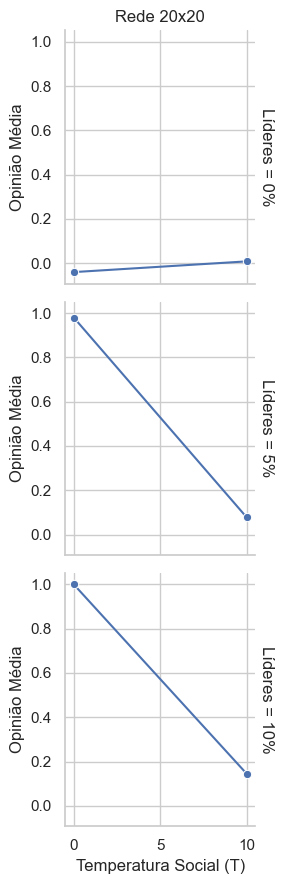

In [21]:
temperaturas2 = [0.001, 10]
liderancas2 = [0.0, 0.05, 0.10]
tamanhos2 = [20]
n_simulacoes2 = 50

resultados2 = run_experiments(temperaturas2, liderancas2, tamanhos2, num_runs=n_simulacoes2)
plot_results(resultados2)

Quando não há líderes, a opinião média varia entorno de 0.0. Em casos de mínima temperatura social, poucos líderes já são suficientes para influenciar a maioria, enquanto que, em temperaturas sociais elevadas, são necessários mais líderes para atingir o mesmo nível de influência.

<font size="4">**✅ Susceptibilidade social**<font>

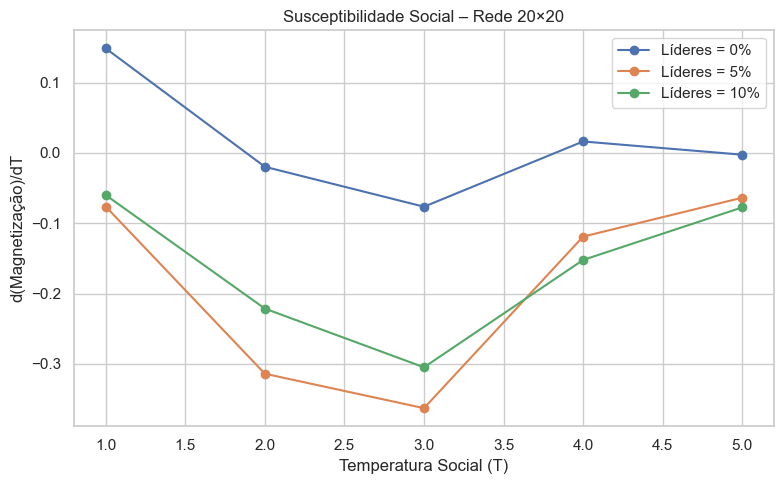

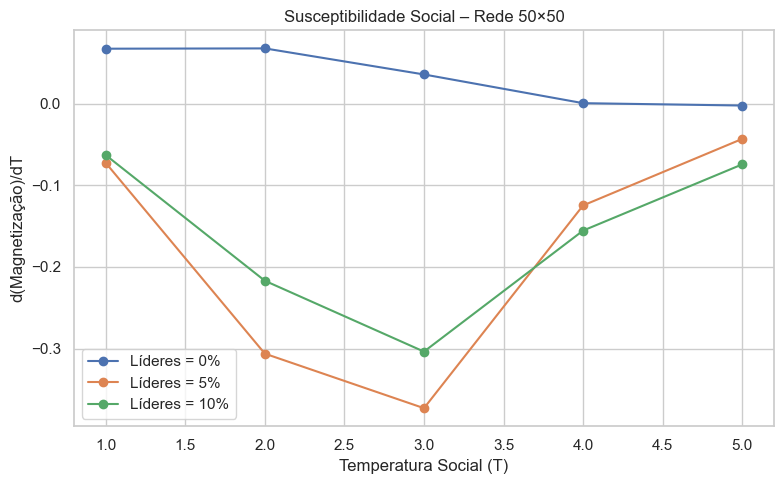

In [54]:
def plot_dmdt(results, fixed_size=50):
    # Filtra os dados para a rede com tamanho fixo
    df = pd.DataFrame(results)
    df = df[df["size"] == fixed_size]

    # Ordena para facilitar o cálculo da derivada
    df = df.sort_values(by=["leaders", "T"])

    # Lista de líderes únicos
    leader_levels = sorted(df["leaders"].unique())

    plt.figure(figsize=(8, 5))
    for leaders in leader_levels:
        subset = df[df["leaders"] == leaders]
        T = subset["T"].values
        M = subset["mean_opinion"].values

        # Calcula a derivada numérica dM/dT
        dMdT = np.gradient(M, T)

        plt.plot(T, dMdT, marker='o', label=f"Líderes = {int(leaders * 100)}%")

    plt.xlabel("Temperatura Social (T)")
    plt.ylabel("d(Magnetização)/dT")
    plt.title(f"Susceptibilidade Social – Rede {fixed_size}×{fixed_size}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Exemplo de uso com os resultados carregados
plot_dmdt(resultados, fixed_size=20)
plot_dmdt(resultados, fixed_size=50)

A derivada da magnetização em relação à temperatura (dM/dT) representa a "susceptibilidade social", ou seja, o quanto a opinião média muda com pequenas variações em T. É interessante observar que a susceptibilidade social decresce com o aumento da temperatura, até T=3.0, porém aumenta com temparaturas maiores.

Se 𝑑𝑀/𝑑𝑇 for muito negativo, pequenas mudanças na temperatura causam grandes mudanças no comportamento coletivo, o que significa que a sociedade está instável ou sensível a mudanças no "ambiente social".

Se 𝑑𝑀/𝑑𝑇 for positivo, à medida que a temperatura aumenta, a magnetização (opinião média) também aumenta — ou seja, a sociedade está se tornando mais polarizada ou mais alinhada com a opinião dos líderes mesmo em um ambiente mais caótico ou livre.

Em ambas as redes, quando há 10% de líderes, em temperaturas iguais a 1, 2 e 3, a sociedade é mais suscetível de quando há apenas 5% de líderes. A partir da temperatura igual a 4, ocorre uma inversão, e sociedades com 5% de líderes são mais suscetíveis em T=4.0 e T=5.0.

Ocorre um comportamento peculiar quando não há líderes na sociedade 50x50: a susceptibilidade social decresce não só até T=3.0 (como a sociedade 20x20), mas até T=4.0, permanecendo praticamente constante em T=5.0. Porém, menores são as variações entorno do eixo x, indicando que sociedades maiores sem líderes são menos sensíveis a variações de temperatura social.

<font size="4">**✅ Temperatura crítica**<font>

Considerando os gráficos de temperatura social (eixo x) por magnetização média (eixo y), a queda acentuada de 𝑀 entre T = 2 e T = 3 com 5% e 10% de líderes indica uma transição brusca no comportamento coletivo.

Ademais, o grafico de temperatura social (eixo x) por d(Magnetização)/dT (eixo y) mostra que a derivada da magnetização é mais negativa entre T = 2 e T = 3, atingindo um mínimo em T = 3. Essa faixa de temperatura onde pequenas variações em T causam grandes mudanças no consenso representa uma transição de fase social. Quando há mais líderes (10%), a transição é mais suavizada. 

Dessa forma, é razoável investigar se a temperatura crítica do sistema ocorre aproximadamente em T = 3, uma vez que a derivada da magnetização atinge o valor mais negativo ali, indicando a máxima susceptibilidade social (ponto em que a rede perde o consenso rapidamente com pequenos aumentos de ruído).

<font size="4.3">**4. Conclusões**<font>


Os resultados obtidos evidenciam a presença de uma transição de fase no modelo de Ising aplicado a dinâmicas sociais: à medida que a temperatura social aumenta, o sistema passa de um estado ordenado (com consenso ou opinião dominante) para um estado desordenado (sem consenso, mais polarizado).

Além disso, os experimentos indicam que grupos menores são mais suscetíveis à influência de líderes, enquanto redes maiores demonstram maior resistência à centralização da opinião. À medida que os indivíduos se tornam menos influenciáveis (temperaturas mais altas), a presença de líderes fixos tem impacto reduzido, destacando que a liderança é mais eficaz em contextos de maior coesão social ou menor ruído.


Mesmo uma pequena fração de líderes (5%–10%) é suficiente para alterar significativamente a opinião média da população, sugerindo que minorias organizadas podem orientar a dinâmica de maiorias não estruturadas.

Por fim, o modelo se mostra sensível ao tamanho da rede, reforçando a importância da escala na análise de fenômenos sociais e coletivos.

<font size="4.3">**5. Possíveis extensões**<font>

Com base nos resultados obtidos, várias extensões podem ser propostas para aprofundar a análise do modelo de Ising aplicado à dinâmica de opiniões:

* Investigar a temperatura crítica do sistema: propor simulações com outras temperaturas sociais, considerando os valores de susceptibilidade social e os arquivos .gifs gerados, em busca de comportamentos emergentes.

* Incorporação de líderes com opiniões divergentes: incluir líderes com spins fixos de sinais opostos (+1 e −1) permite investigar cenários de disputa ideológica ou polarização intencional.

* Análise espacial da formação de regiões: estudar a organização espacial das opiniões (clusters) sob diferentes temperaturas sociais pode revelar padrões de coesão ou fragmentação.

* Modelagem matemática da magnetização social: encontrar relações que descrevam a magnetização média em termos da temperatura social, percentual de líderes e tamanho da rede. Isso pode permitir identificar configurações distintas que resultam em consensos semelhantes.

* Avaliação do tempo de convergência: medir o número de iterações necessárias para  que o sistema alcance o equilíbrio ou o consenso sob diferentes condições iniciais.

* Cálculo da entropia de opinião: quantificar o grau de desordem nas opiniões (entropia) pode fornecer métricas relevantes para caracterização do comportamento coletivo.